# Classification of basalt source [20 points]

## Import scientific python libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import copy

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

<img src="./volcanic-tectonics.png" width = 800 align = 'center'>

In this assignment you will continue your investigation of igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin as we explored a few weeks ago. During class today, we will continue to focus on data from mafic lava flows (these are called basalts and are the relatively low silica, high iron end of what we looked at in week 7).

> Igneous rocks form in a wide variety of tectonic settings,
including mid-ocean ridges, ocean islands, and volcanic
arcs. It is a problem of great interest to igneous petrologists
to recover the original tectonic setting of mafic rocks of the
past. When the geological setting alone cannot unambiguously
resolve this question, the chemical composition of
these rocks might contain the answer. The major, minor,
and trace elemental composition of basalts shows large
variations, for example as a function of formation depth
(e.g., Kushiro and Kuno, 1963) --- *Vermeesch (2006)*

For this analysis we are going to use a dataset that was compiled in 

Vermeesch (2006) Tectonic discrimination of basalts with classification trees, *Geochimica et Cosmochimica Acta*  https://doi.org/10.1016/j.gca.2005.12.016

These data were grouped into 3 categories:

- 241 ***Mid-ocean ridge (MORB)*** samples from the East Pacific Rise, Mid Atlantic Ridge, Indian Ocean, and Juan de Fuca Ridge.
- 259 ***Ocean-island (OIB)*** samples from St. Helena, the Canary, Cape Verde, Caroline, Crozet, Hawaii-Emperor, Juan Fernandez, Marquesas, Mascarene, Samoan, and Society islands.
- 256 ***Island arc basalts (IAB)*** from the Aeolian, Izu-Bonin, Kermadec, Kurile, Lesser Antilles, Mariana, Scotia, and Tonga arcs.
- 
**Let's look at the illustration above and determine where each of these settings are within a plate tectonic context**

### The overall learning and classification process
1. Read in data with known classifications
2. Determine useful paramters to train on (useful parameters are those that will allow us to distinguish betwen different classifications
3. Convert data to format that sklearn can use (arrays)
4. Chose some classifier
5. Train/Fit some chosen classifier using the data (with known classifications)
6. Predict the classifications for other data using that trained classifier
7. Compare predictions with inputs

# Part 1: Applying the learning and classification process for the first time

## 1. Read in data


The data are from the supplemental materials of the Vermeesch (2006) paper. The samples are grouped by affinity MORB, OIB, and IAB. They are additionally assigned affinity codes and colors from the default matplotlib cycle:

|affinity| affinity code | color |
|--------|---------------|-------|
| MORB| 0 | C0
| OIB |  1 | C1
| IAB |  2 | C2

Remember the **affinity code**, this will be important later.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Read `../data/Vermeesch2006.csv` into data frame `basalt_data`

In [2]:
basalt_data = pd.read_csv('data/Vermeesch2006.csv')
basalt_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865


### 2. Determine useful paramters to train on: Filter the data to ones that have Ti and V data

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

**Filter out the rows with NaN values in the `TiO2 (wt%)` or `'V (ppm)'` columns** (i.e. keep rows where its is not true that both of these are nans, you may need `~` and `isna()`). Assign this to a new dataframe called `basalt_data_Ti_V`. 


In [3]:
#Remove rows where `TiO2 (wt%)` or 'V (ppm)' are nan.
# vanadium
# titanium

print(len(basalt_data))
basalt_data_Ti_V = basalt_data.dropna(subset=['TiO2\xa0(wt%)','V (ppm)'])
basalt_data_Ti_V

756


,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,IAB,2,C2,51.710,0.930,22.03,NaN,NaN,10.36,3.080,0.120,0.480,3.070,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.0,7.0,NaN,7.00,83.00,75.00,NaN,5.30,430.0,20.40,56.9,NaN,NaN,NaN,143.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,IAB,2,C2,52.000,1.110,15.68,NaN,NaN,10.14,4.810,0.220,0.210,1.980,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,15.0,NaN,10.00,127.00,107.00,NaN,0.00,180.0,23.00,40.0,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,IAB,2,C2,52.230,0.850,17.08,NaN,NaN,10.63,5.630,0.180,0.230,1.880,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0,137.0,NaN,41.00,64.00,94.00,NaN,0.00,170.5,25.00,45.0,NaN,NaN,NaN,94.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,IAB,2,C2,52.700,0.840,17.02,NaN,10.42,10.58,5.870,0.170,0.280,2.030,0.10,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.00,299.0,78.0,NaN,31.00,72.00,87.00,16.00,4.00,170.0,25.00,41.0,1.00,NaN,NaN,85.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=green>**_Hint:_**</font> **You should end up with 514 elements in your `basalt_data_Ti_V` dataframe.**

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Split the data into three dataframes for affinities of `MORB`, `OIB`, and `IAB`.

In [4]:
'''
affinity	affinity code	color
MORB	0	C0
OIB	1	C1
IAB	2	C2
'''

MORB_data = basalt_data_Ti_V[basalt_data_Ti_V['affinity code']==0]
OIB_data = basalt_data_Ti_V[basalt_data_Ti_V['affinity code']==1]
IAB_data = basalt_data_Ti_V[basalt_data_Ti_V['affinity code']==2]

## Can geochemical data be used to classify the tectonic setting?

These data are labeled. The author already determined what setting these basalts came from. However, is there a way that we could use these labeled data to determine the setting for an unknown basalt?

A paper published in 1982 proposed that the elements titanium and vanadium were particular good at giving insight into tectonic setting. The details of why are quite complicated and can be summarized as "the depletion of V relative to Ti is a function of the fO2 of the magma and its source, the degree of partial melting, and subsequent fractional crystallization." If you take GEOL 345 you will learn more about the fundamentals behind this igneous petrology. *For the moment you can consider the working hypothesis behind this classification to that different magmatic environments have differences in oxidation states that are reflected in Ti vs V ratios.*

Shervais, J.W. (1982) Ti-V plots and the petrogenesis of modern and ophiolitic lavas *Earth and Planetary Science Letters* https://doi.org/10.1016/0012-821X(82)90120-0

### Plot TiO2 (wt%) vs V (ppm)

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Make a single scatter plot of TiO2 (wt%) vs V (ppm) with the markers color-coded by affinity (i.e. MORB, OIB, and IAB). Include axis labels and a legend.

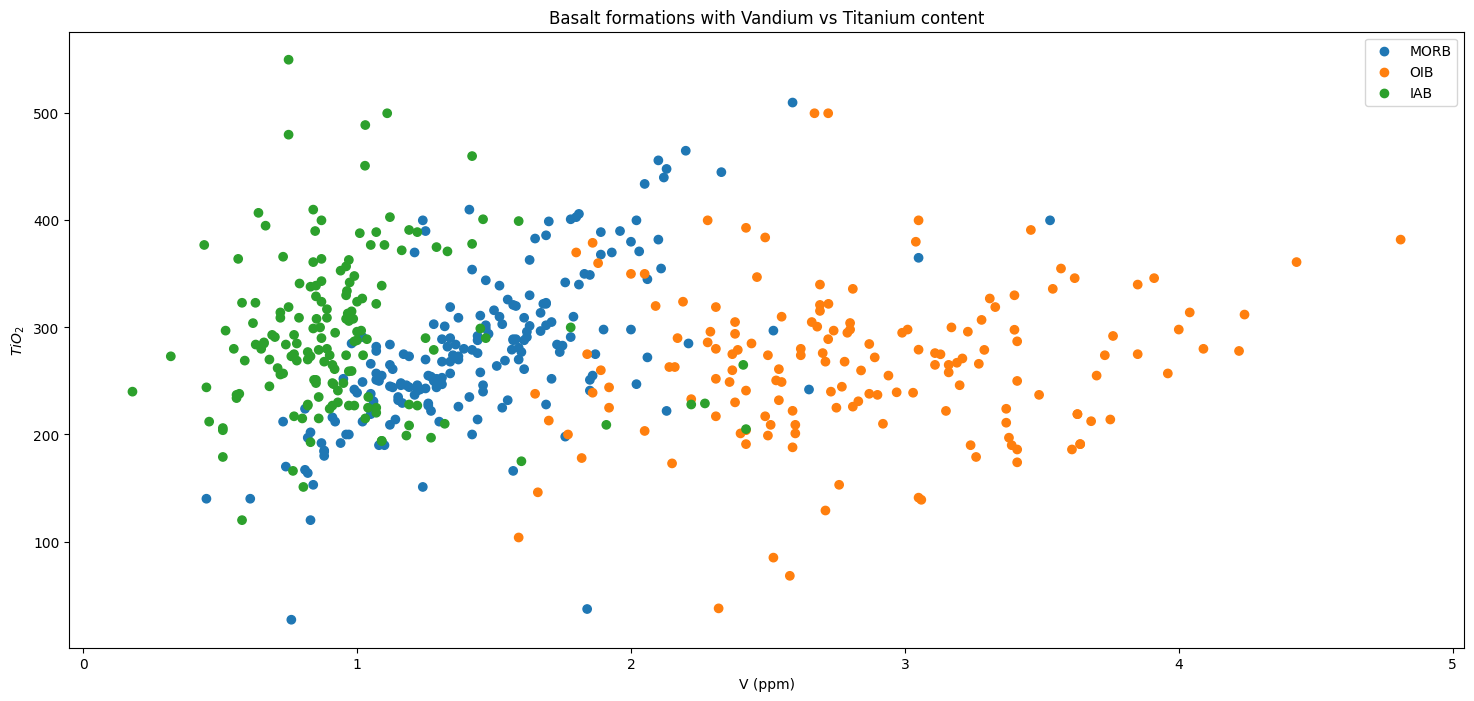

In [5]:
#Scatter plot of TiO2 (wt%) vs V (ppm) for all of MORB, OIB, and IAB, colour-coded by affinity/type
plt.figure(figsize=(18, 8))
affinity = [l for l in basalt_data_Ti_V['affinity'].unique()]
for category in affinity:
    df= basalt_data_Ti_V[basalt_data_Ti_V['affinity']==category]
    plt.scatter(df['TiO2\xa0(wt%)'], df['V (ppm)'], c = df['color'], label=category)

plt.title('Basalt formations with Vandium vs Titanium content')
plt.xlabel('V (ppm)')
plt.ylabel(r'$TiO_2$')
plt.legend()
plt.show()

## Classification by-eye method

In order to classify the basalt into their affinity based on titanium and vanadium concentrations, we can use a classification method.

The goal here is to be able to make an inference of what environment an unknown basalt formed in based on comparison to these data.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Let's say that we have three rocks where there affinity is unknown.
- rock 1 has TiO2 of 4% and V concentration of 300 ppm
- rock 2 has TiO2 of 1% and V concentration of 350 ppm
- rock 3 has TiO2 of 1.9% and V concentration of 200 ppm

You don't need to convert percent to ppm, just enter the values as they're written above.

In [6]:
rock_1_TiO2 = 4
rock_1_V = 300
rock_2_TiO2 = 1
rock_2_V = 350
rock_3_TiO2 = 1.9
rock_3_V = 200

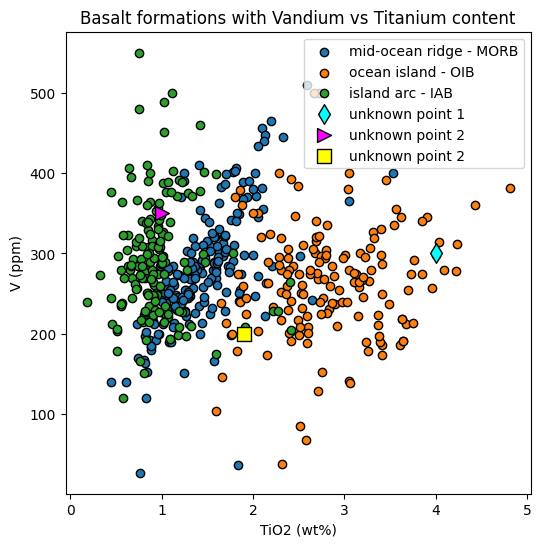

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(MORB_data['TiO2 (wt%)'],MORB_data['V (ppm)'],label='mid-ocean ridge - MORB',edgecolors='black')
plt.scatter(OIB_data['TiO2 (wt%)'],OIB_data['V (ppm)'],label='ocean island - OIB',edgecolors='black')
plt.scatter(IAB_data['TiO2 (wt%)'],IAB_data['V (ppm)'],label='island arc - IAB',edgecolors='black')
plt.scatter(rock_1_TiO2,rock_1_V,label='unknown point 1',color='cyan',edgecolors='black',marker='d',s=100)
plt.scatter(rock_2_TiO2,rock_2_V,label='unknown point 2',color='magenta',edgecolors='black',marker='>',s=100)
plt.scatter(rock_3_TiO2,rock_3_V,label='unknown point 2',color='yellow',edgecolors='black',marker='s',s=100)
plt.title('Basalt formations with Vandium vs Titanium content')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

<font color=red>**_Question:_**</font> Based on the graph, what affinity do you think that rocks 1, 2, and 3 should have? **[1 point]**

**Write your answer in the box below.**

- rock 1 has TiO2 of 4% and V concentration of 300 ppm - OIB
- rock 2 has TiO2 of 1% and V concentration of 350 ppm - IAB
- rock 3 has TiO2 of 1.9% and V concentration of 200 ppm - MORB

## Nearest Neighbors Classification

In nearest neighbors classification, classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. There are different ways this can be done and can be weighted.



### Normalize the data

Given that the nearest neighbor is a distance and TiO2 and V have ranges that are so different (in part because of different units) you need to normalize the data. **Divide the 'TiO2 (wt%)' by the maximum 'TiO2 (wt%)' in the dataframe to get a value between 0 and 1.** 

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Add to your filtered dataframe a column called `Ti_norm` that is normalized TiO2.

In [8]:
#Create column of normalised Ti content
TiO2_max = np.max(basalt_data_Ti_V['TiO2\xa0(wt%)'])
basalt_data_Ti_V['Ti_norm'] = basalt_data_Ti_V['TiO2\xa0(wt%)']/TiO2_max
basalt_data_Ti_V.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN,0.523909
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878,0.242204
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920,0.347193
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828,0.325364
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865,0.338877


<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Make a column called `V_norm` that is normalized vanadium. Calculate this in the same way, **dividing `V (ppm)` by the maximum `V (ppm)` in the dataframe.**

In [9]:
#Create column of normalised V content
V_max = np.max(basalt_data_Ti_V['V (ppm)'])
basalt_data_Ti_V['V_norm'] = basalt_data_Ti_V['V (ppm)']/V_max
basalt_data_Ti_V.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN,0.523909,0.540000
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878,0.242204,0.417091
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920,0.347193,0.539273
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828,0.325364,0.507636
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865,0.338877,0.548000


<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Make a scatter plot of `Ti_norm` vs `V_norm` that is **colored by affinity**. It should look similar to the previous scatter plot.

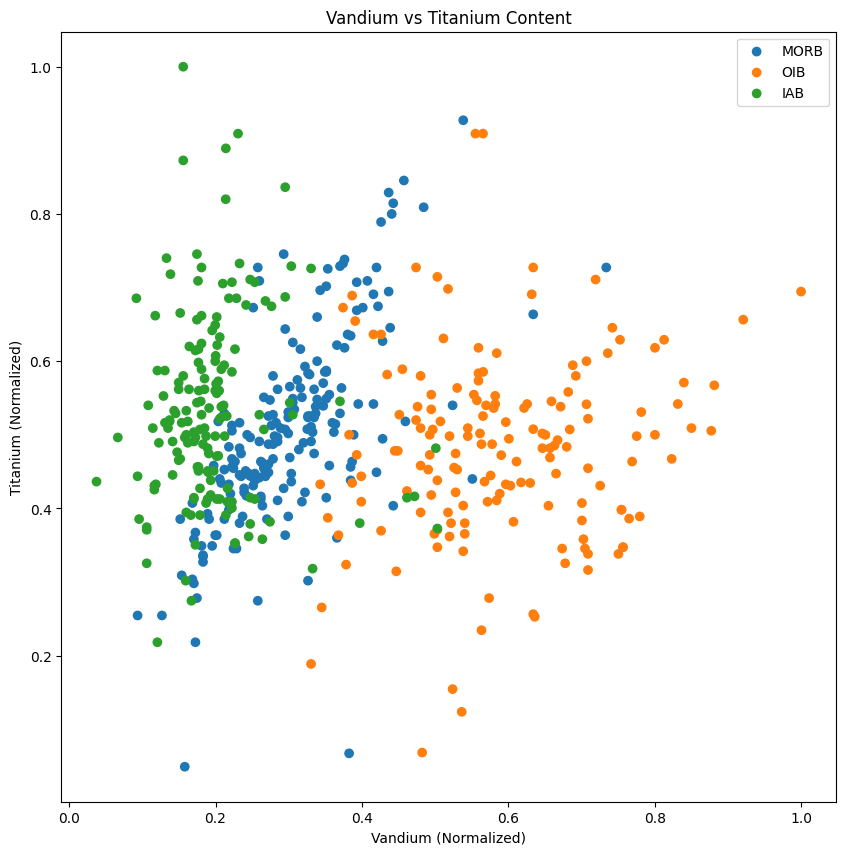

In [10]:
#X-Y scatter plot of Ti_norm vs V_norm that is colored by affinity
plt.figure(figsize=(10,10))
affinity = [l for l in basalt_data_Ti_V['affinity'].unique()]
for category in affinity:
    df= basalt_data_Ti_V[basalt_data_Ti_V['affinity']==category]
    plt.scatter(df['Ti_norm'], df['V_norm'], c = df['color'], label=category)

plt.title('Vandium vs Titanium Content')
plt.xlabel('Vandium (Normalized)')
plt.ylabel('Titanium (Normalized)')
plt.legend()
plt.show()

### 3. Convert data to format that sklearn can use (arrays): Preparing arrays of the data

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Make a 2 x n array of the `TiO2 norm` and `V norm` values (where n is the number of data points) and a 1 x n array of the classifications (the tectonic affinities).

Use `.values` to get the numbers out of the dataframe.
Use `.tolist()` to convert the affinities to a list.

In [11]:
#Array of Ti_norm and V_norm
training_values = basalt_data_Ti_V[['Ti_norm', 'V_norm']].values
training_values

array([[0.52390852, 0.54      ],
       [0.24220374, 0.41709091],
       [0.34719335, 0.53927273],
       ...,
       [0.17671518, 0.61636364],
       [0.17463617, 0.54363636],
       [0.15800416, 0.49636364]])

In [12]:
#Array of affinities
training_labels = basalt_data_Ti_V['affinity'].tolist()
training_labels[:5]

['MORB', 'MORB', 'MORB', 'MORB', 'MORB']

### 4. Chose some classifier: Define your classifier

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Construct a classifier that uses the 5 nearest neighbors `neighbors.KNeighborsClassifier` (`n_neighbors=5`) and weight points by the inverse of their distance (`weights='distance'`) such that closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [13]:
#Define n_neighbor classifier
#Make a nearest neighbors classifier object
classifier_neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')



### 5. Train/Fit some chosen classifier using the data (with known classifications): Fit/train the classifier

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Feed the array of the data and the array of the classification in a `.fit` function preformed on the classifier object.

In [14]:
#Fit the classifier with the basalt_Ti_V and affinity arrays
fit=classifier_neighbors.fit(training_values,training_labels)

In [15]:
training_values

array([[0.52390852, 0.54      ],
       [0.24220374, 0.41709091],
       [0.34719335, 0.53927273],
       ...,
       [0.17671518, 0.61636364],
       [0.17463617, 0.54363636],
       [0.15800416, 0.49636364]])

### Normalize the mystery rocks

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Convert the TiO2 and V values of rocks 1, 2 and 3 to Ti norm and V norm (using the maximum values from the dataframe like we did with the whole dataframe).

In [16]:
#Convert the TiO2 and V values of rocks 1, 2 and 3 to Ti norm and V norm
point_1_TiO2_norm = rock_1_TiO2/TiO2_max
point_1_V_norm = rock_1_V/V_max
point_2_TiO2_norm = rock_2_TiO2/TiO2_max 
point_2_V_norm = rock_2_V/V_max
point_3_TiO2_norm = rock_3_TiO2/TiO2_max
point_3_V_norm = rock_3_V/V_max

### Predict the tectonic affinity of the mystery points using the neighbors classifier

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Use `.predict` to predict the tectonic affinity of these normalized mystery points using the trained neighbors alorithm.

In [17]:
test = np.array([
    [point_1_TiO2_norm, point_1_V_norm],
    [point_2_TiO2_norm, point_2_V_norm],
    [point_3_TiO2_norm, point_3_V_norm],
])

#Predict the affinities of the normalised mystery rocks using the trained algorithm
# prediction = classifier_neighbors.predict([point_1_TiO2_norm, point_1_V_norm])
prediction = classifier_neighbors.predict(test)
prediction

array(['OIB', 'IAB', 'OIB'], dtype='<U4')

<font color=red>**_Question:_**</font> What affinities does the classifier predict for the mystery rocks? **[1 point]**

**Write your answer in the box below.**

Point 1 was Oceanic Island, Point 2 was Island Arc, and Point 3 was Ocean Island

### 6. Predict the classifications for other data using that trained classifier: Visualizing the decision boundary

Make a 101 x 101 grid of x and y values between 0 and 1.

**This is done for you**

In [18]:
#Make a 101 x 101 grid of x and y values between 0 and 1
xx, yy = np.meshgrid(np.linspace(0, 1, 101),
                     np.linspace(0, 1, 101))
grid=(np.vstack((xx.flatten(), yy.flatten())).T)

For the purposes of plotting, we're going to use the **basalt_affinity_code** column which is a number, instead of the **basalt_affinity** column, which is a string.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Re-fit `classifier_neighbors` with **basalt_Ti_V** and **basalt_affinity_code**

In [19]:
#Fit the classifier with the basalt_Ti_V and affinity code arrays
training_codes = basalt_data_Ti_V['affinity code'].tolist()
classifier_neighbors.fit(training_values,training_codes)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Classify the grid (test data points)

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Use `.predict` to predict the tectonic affinity code of these `grid` test points using the trained neighbors alorithm.

In [20]:
#Predict the tectonic affinity of these grid test points
grid_classes = fit.predict(grid)

#Reshape grid_classes to the shape of the variable xx
grid_classes = grid_classes.reshape(xx.shape)

In [21]:
grid_classes

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

### 7. Compare predictions with inputs: Visualise the fits

Plot the classification boundaries by plotting the grid points colorcoded by their classifation. Add a scatter plot of the observed (normalized) data points points colorcoded by their labels on top.

**This is done for you.**

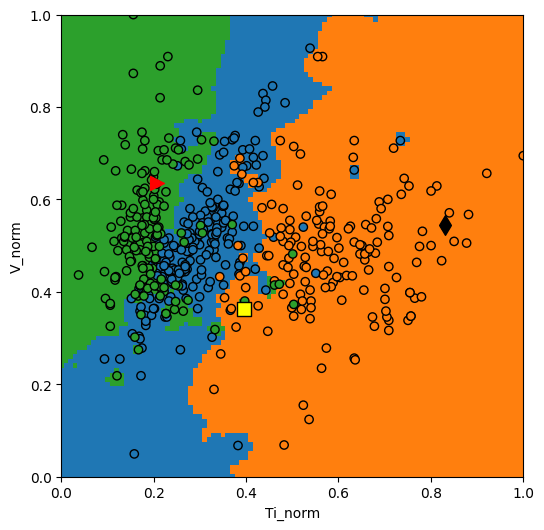

In [22]:
#Plot scatter of the basalt_data_Ti_V over the fit grid of classes
cmap = ListedColormap(['C0', 'C1', 'C2'])

plt.figure(figsize=(6,6))

plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],
                           color=basalt_data_Ti_V['color'],edgecolors='black')

plt.scatter(point_1_TiO2_norm,point_1_V_norm,label='unknown point 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2_norm,point_2_V_norm,label='unknown point 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2_norm,point_3_V_norm,label='unknown point 2',color='yellow',edgecolors='black',marker='s',s=100)

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

# Part 2: Repeating the training to test the effectiveness of the classifier

How good is your nearest neighbor classifier? To answer this you'll need to find out how frequently your classifications are correct.

**Most of this is done for you.**

### 1. Read in data with known classifications: Making a training and testing data set from the existing data

There are 514 rows with TiO2 and V data. Use **half of them (randomly selected) for training and the other remaining half for testing**. To do this, shuffle all the rows, take the first 257 as the training set, and the remaining 257 for testing.

In [23]:
# Make a randomly ordered dataframe from the initial one
randomized_basalt_data = basalt_data_Ti_V.sample(frac=1) 

# Take the first 257 data points to use for "training"
training_data = copy.deepcopy(randomized_basalt_data.iloc[0:257])

# Use the rest to apply our machine learning on
remaining_data = copy.deepcopy(randomized_basalt_data.iloc[257:])

### 3. Convert data to format that sklearn can use (arrays)

In [24]:
basalt_Ti_V_training = training_data[['Ti_norm', 'V_norm']].values
basalt_Ti_V_remaining = remaining_data[['Ti_norm', 'V_norm']].values
basalt_affinity_training = training_data['affinity code'].tolist()

### 4. Chose some classifier and 5. Train/Fit some chosen classifier using the data (with known classifications)

In [25]:
classifier_neighbors.fit(basalt_Ti_V_training, basalt_affinity_training)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 6. Predict the classifications for other data using that trained classifier: Visualize the classification regions fit with half the data

Send the grid to the classifier to see the classification regions and decision boundary that has been fit with half of the data.

In [26]:
grid_classes = classifier_neighbors.predict(grid)
grid_classes = grid_classes.reshape(xx.shape)

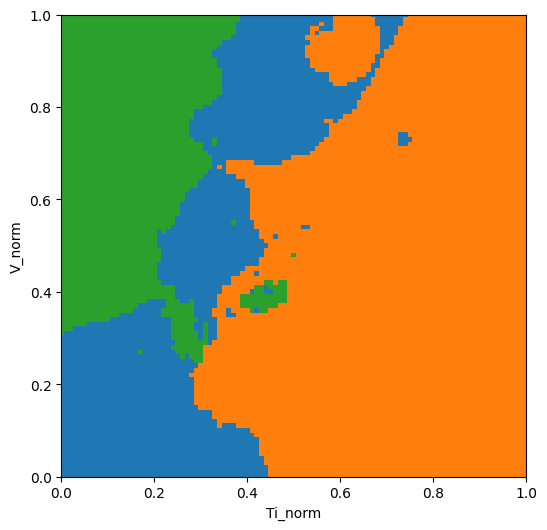

In [27]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### 7. Compare predictions with inputs: Compare the remaining data (test data) to the classification regions

Place the test data on this graph and you can see at once that while the classifier got many of the points right, there are some mis-classified points.

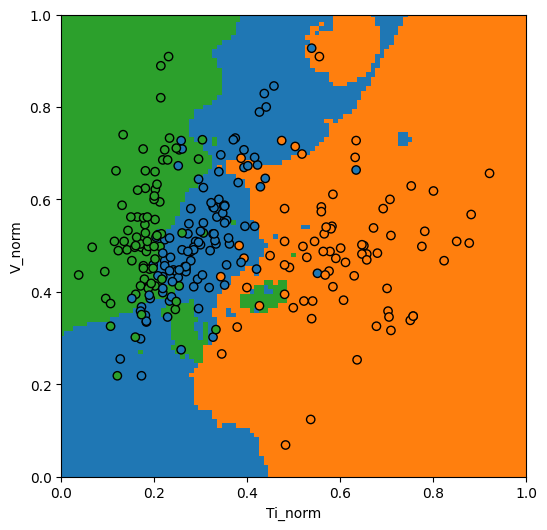

In [28]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)

plt.scatter(remaining_data['Ti_norm'],remaining_data['V_norm'],
                           color=remaining_data['color'],edgecolors='black')

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Estimating the accuracy of the classifier

Since the test set was chosen randomly from the original sample it should perform with similar accuracy on the overall population. Let's calculate the success rate of the classification.

Predict the affinities for the remaining data `basalt_Ti_V_remaining` using the `classifier_neighbors` trained using `basalt_Ti_V_training`. Assign these classified affinities to a new column in pandas.

In [29]:
remaining_classes = classifier_neighbors.predict(basalt_Ti_V_remaining)

In [30]:
remaining_data['predicted_class'] = remaining_classes

In [31]:
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class
139,MORB,0,C0,50.49,1.29,16.94,1.24,7.75,11.88,7.45,0.16,0.07,2.72,0.13,2.30,8.30,NaN,7.70,3.10,1.100,NaN,0.70,NaN,NaN,NaN,0.490,2.500,0.420,37.0,247.0,261.0,41.0,109.0,NaN,NaN,NaN,0.62,100.0,NaN,NaN,NaN,NaN,0.006,704.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702680,NaN,NaN,NaN,0.268191,0.449091,0
50,MORB,0,C0,49.48,1.39,16.72,1.16,7.58,11.14,8.20,0.19,0.24,2.66,0.12,6.20,NaN,2.700,20.00,6.60,1.900,7.100,1.47,NaN,1.80,NaN,0.760,4.500,NaN,44.0,280.0,320.0,34.0,140.0,86.0,NaN,17.0,NaN,160.0,47.00,88.0,NaN,NaN,NaN,19.0,NaN,NaN,1.150,NaN,NaN,NaN,NaN,17.824,15.540,37.520,0.288981,0.509091,0
508,IAB,2,C2,49.04,0.55,17.41,2.17,6.65,13.77,8.31,0.17,0.14,1.32,0.01,1.05,3.48,0.536,3.09,1.12,0.417,1.401,0.24,1.58,0.33,1.0,0.137,0.971,0.147,46.1,280.0,159.0,50.4,56.2,107.0,59.4,15.7,2.83,203.0,9.62,16.6,0.22,NaN,0.130,49.1,0.53,0.017,0.907,0.139,0.061,0.513053,0.703504,18.671,15.587,38.406,0.114345,0.509091,2
35,MORB,0,C0,48.64,1.41,14.98,2.08,6.84,11.67,10.60,0.16,0.27,2.22,0.23,12.40,27.10,NaN,12.60,3.19,1.180,NaN,0.60,NaN,0.80,NaN,NaN,2.220,0.360,36.0,235.0,560.0,42.0,225.0,60.0,NaN,15.0,NaN,185.0,24.00,95.0,NaN,NaN,NaN,105.0,1.90,1.400,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,0.293139,0.427273,0
678,IAB,2,C2,49.05,0.97,17.14,4.60,4.16,11.59,5.11,0.16,2.07,3.20,0.42,50.00,76.00,NaN,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,227.0,59.0,32.0,38.0,NaN,NaN,NaN,57.00,520.0,26.00,145.0,14.00,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201663,0.412727,2


Now you have a new column of the classified affinities for the test data. You also have the actually affinities given that the data were originally labeled with classifications. 

We can create a new series called `correct_assignment` where `predicted_class` equals the original `affinity code`.

In [32]:
remaining_data['correct_assignment'] = remaining_data['predicted_class'].eq(remaining_data['affinity code'])
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class,correct_assignment
139,MORB,0,C0,50.49,1.29,16.94,1.24,7.75,11.88,7.45,0.16,0.07,2.72,0.13,2.30,8.30,NaN,7.70,3.10,1.100,NaN,0.70,NaN,NaN,NaN,0.490,2.500,0.420,37.0,247.0,261.0,41.0,109.0,NaN,NaN,NaN,0.62,100.0,NaN,NaN,NaN,NaN,0.006,704.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702680,NaN,NaN,NaN,0.268191,0.449091,0,True
50,MORB,0,C0,49.48,1.39,16.72,1.16,7.58,11.14,8.20,0.19,0.24,2.66,0.12,6.20,NaN,2.700,20.00,6.60,1.900,7.100,1.47,NaN,1.80,NaN,0.760,4.500,NaN,44.0,280.0,320.0,34.0,140.0,86.0,NaN,17.0,NaN,160.0,47.00,88.0,NaN,NaN,NaN,19.0,NaN,NaN,1.150,NaN,NaN,NaN,NaN,17.824,15.540,37.520,0.288981,0.509091,0,True
508,IAB,2,C2,49.04,0.55,17.41,2.17,6.65,13.77,8.31,0.17,0.14,1.32,0.01,1.05,3.48,0.536,3.09,1.12,0.417,1.401,0.24,1.58,0.33,1.0,0.137,0.971,0.147,46.1,280.0,159.0,50.4,56.2,107.0,59.4,15.7,2.83,203.0,9.62,16.6,0.22,NaN,0.130,49.1,0.53,0.017,0.907,0.139,0.061,0.513053,0.703504,18.671,15.587,38.406,0.114345,0.509091,2,True
35,MORB,0,C0,48.64,1.41,14.98,2.08,6.84,11.67,10.60,0.16,0.27,2.22,0.23,12.40,27.10,NaN,12.60,3.19,1.180,NaN,0.60,NaN,0.80,NaN,NaN,2.220,0.360,36.0,235.0,560.0,42.0,225.0,60.0,NaN,15.0,NaN,185.0,24.00,95.0,NaN,NaN,NaN,105.0,1.90,1.400,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,0.293139,0.427273,0,True
678,IAB,2,C2,49.05,0.97,17.14,4.60,4.16,11.59,5.11,0.16,2.07,3.20,0.42,50.00,76.00,NaN,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,227.0,59.0,32.0,38.0,NaN,NaN,NaN,57.00,520.0,26.00,145.0,14.00,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201663,0.412727,2,True


<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Calculate the percentage of `remaining_data` where `'correct_assignment'` is `True`

In [33]:
#Calculate percentage of data where assignment is correct
percent_correct = np.sum(remaining_data['correct_assignment'])/len(remaining_data['correct_assignment'])
print(f"{(percent_correct*100):.1f}%")

82.9%


<font color=red>**_Question:_**</font> What proportion of the affinities predicted for the dataset **are correct**? **[1 point]**

**Write your answer in the box below.**

82.9% were correct. 

### Using scikit-learn functions to get an accuracy score of this nearest neighbor approach

Given that this approach of randomly splitting the data into training and test groups is quite common in machine learning classification, there are built-in convenience functions that can be used to more compactly do the same operations that you did above: `train_test_split` and `accuracy_score`.

Use `train_test_split` to calculate the proportion of predictions that are correct. Set **train_size** to match what we used above. **train size** is the proportion of the dataset used for training, check above to see what proportion we used when we split our data into training and testing.

**This has been done for you**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(basalt_Ti_V_training, basalt_affinity_training,train_size=.5)

# fit the model on one set of data
classifier_neighbors.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = classifier_neighbors.predict(X2)
accuracy_score(y2, y2_model)

0.8294573643410853

<font color=red>**_Question:_**</font> According to sklearn, proportion of the affinities predicted for the dataset **are correct**?  **[1 point]**

**Write your answer in the box below.**

Using the sklearn train_test_split and accuracy score, we have 77.5% correct. 

# Appendix: Other classification algorithms

If you go to the scikit-learn homepage you will find many available classifiers: https://scikit-learn.org/stable/index.html. They are nicely illustrated in this code from the scikit-learn documentation.

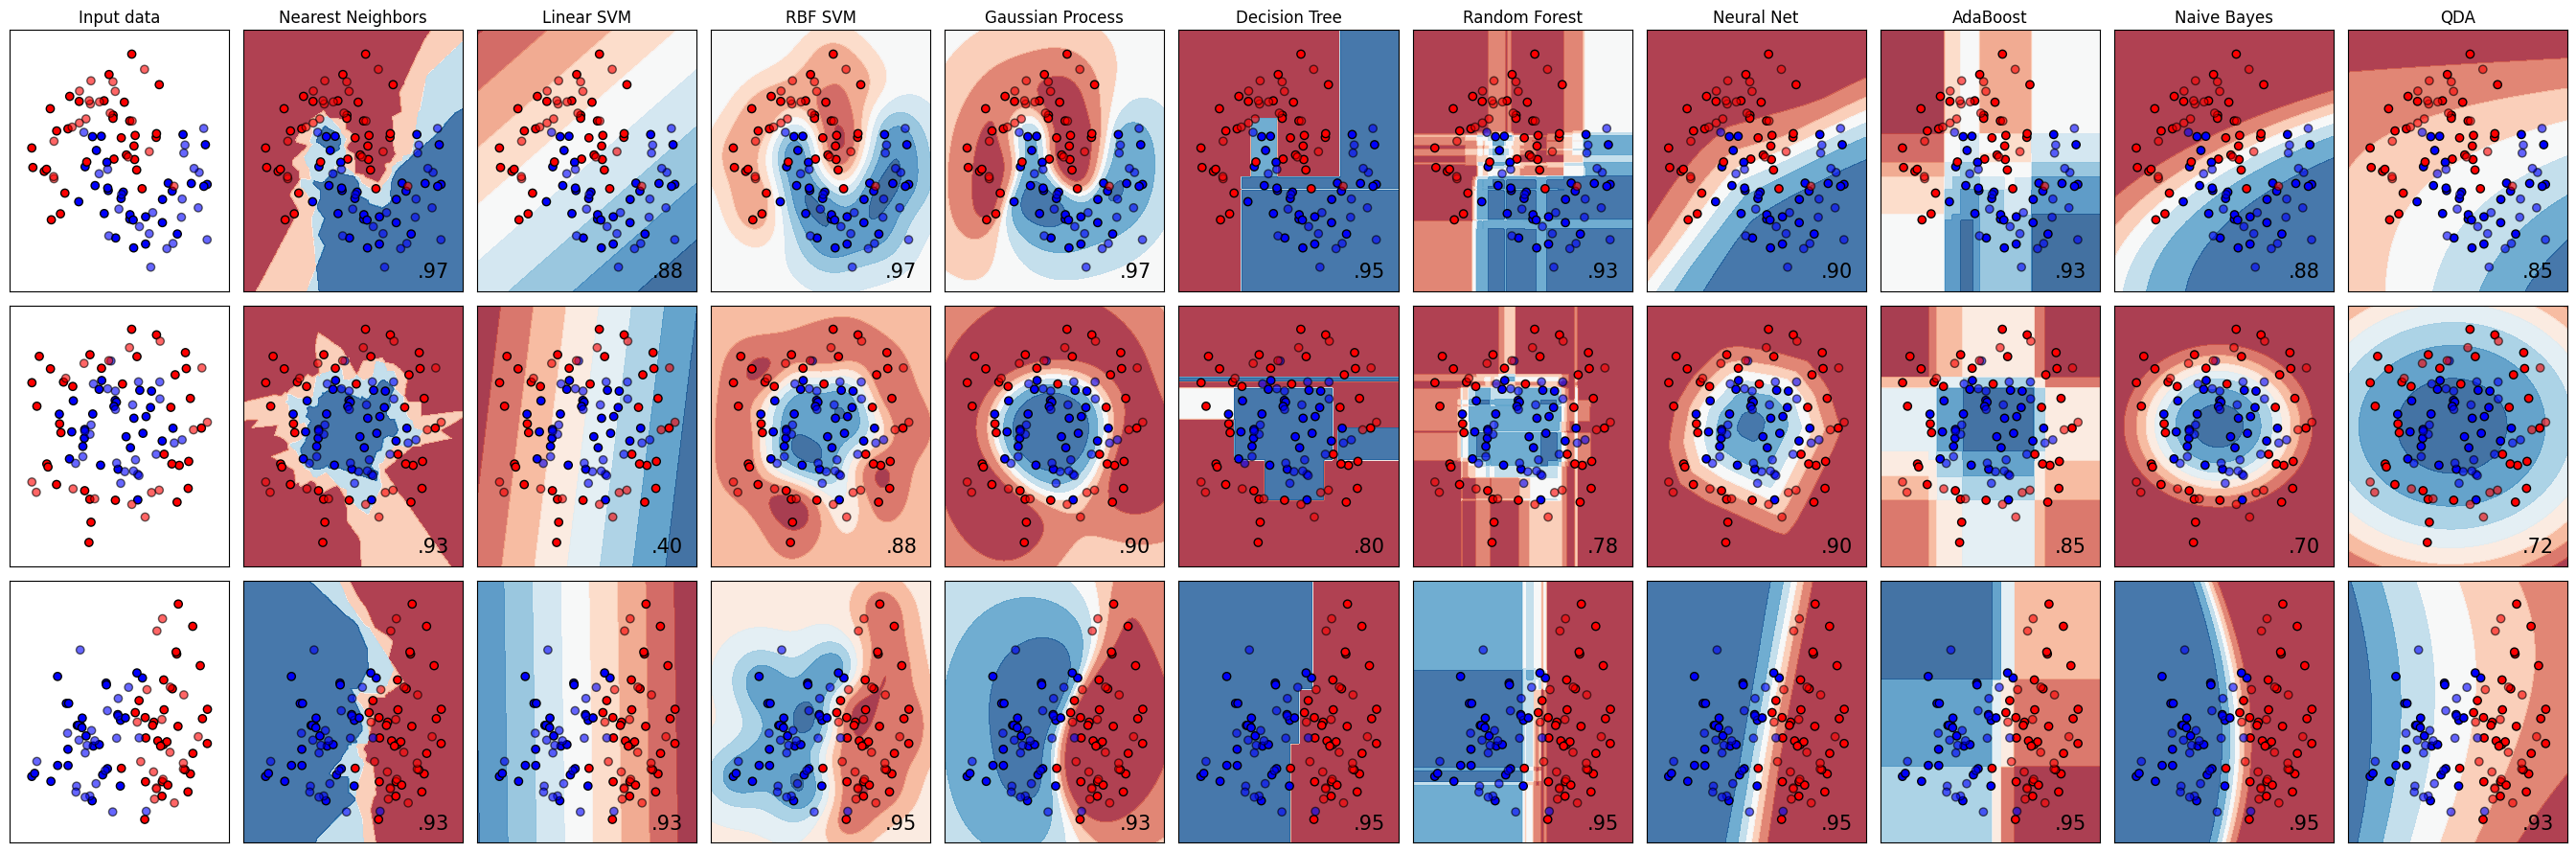

In [35]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

As a word of warning, we shouldn't get too carried away. Clearly, there are complexities related to this approach (our accuracy scores aren't that high). Shervais notes that: 
> "More specific evaluation of the tectonic setting of these and other ophiolites requires
application of detailed geologic and petrologic data as well as geochemistry. The Ti/V discrimination diagram, however,
is a potentially powerful adjunct to these techniques."

Additionally, we would like to be able to assign physical processes to the classification.

### Turn in the Notebook

Save your completed notebook and add your username to the end, e.g. W12_Classification_basalts_assignment_**dfrost**.ipynb.